# Kaggle Competition: House Prices: Advanced Regression Techniques

Competition Description:

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques#description

## 1) Business Understanding

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## 2) Data Understanding

### 2.1 Import Libraries

In [2]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as stats
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import matplotlib.pylab as pylab
#configure visualizations
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6


# machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# # Modelling Helpers
# from sklearn.preprocessing import Imputer , Normalizer , scale
# from sklearn.cross_validation import train_test_split , StratifiedKFold
# from sklearn.feature_selection import RFECV

### 2.2 Load Data

In [147]:
train = pd.read_csv('train.csv')
print(train.shape)
testM = pd.read_csv('test.csv')
print(testM.shape)
#combine = [train, testM]

features = pd.concat([train, testM], keys=['train', 'test'])

(1460, 81)
(1459, 80)


In [217]:
features_master = pd.concat([train, testM], keys=['train', 'test'])

In [26]:
train, test = train_test_split(train, train_size = 0.7)

c:\python27\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### 2.3.1 Statistical Summaries

In [27]:
train.shape

(1021, 81)

In [28]:
test.shape

(439, 81)

In [29]:
print(train.columns.values)
# Classes?

#train.info()

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

In [30]:
# preview the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
833,834,20,RL,100.0,10004,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,167000
1175,1176,50,RL,85.0,10678,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2007,WD,Normal,285000
284,285,120,RL,50.0,8012,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2007,WD,Normal,179200
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1280,1281,20,RL,67.0,9808,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,227000


In [31]:
pd.options.display.max_columns=100
train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1003,1004,90,RL,NaN,11500,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,Feedr,RRAn,Duplex,1Story,5,6,1976,1976,Gable,CompShg,VinylSd,VinylSd,BrkFace,164.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1680,1680,GasA,Fa,Y,SBrkr,1680,0,0,1680,0,0,2,0,4,2,TA,8,Typ,0,NaN,Detchd,1976.0,Unf,2,528,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,136905
1068,1069,160,RM,42.0,3964,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,6,4,1973,1973,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,837,Unf,0,105,942,GasA,Gd,Y,SBrkr,1291,1230,0,2521,1,0,2,1,5,1,TA,10,Maj1,1,Gd,Attchd,1973.0,Fin,2,576,TA,TA,Y,728,20,0,0,0,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,151400
568,569,50,RL,79.0,12327,Pave,NaN,IR1,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,1.5Fin,8,8,1983,2009,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,Gd,TA,Gd,GLQ,1441,Unf,0,55,1496,GasA,Ex,Y,SBrkr,1496,636,0,2132,1,0,1,1,1,1,Gd,5,Min2,1,Gd,BuiltIn,1983.0,Fin,2,612,Gd,TA,Y,349,40,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,316600
1117,1118,20,RL,57.0,9764,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Sawyer,Feedr,Norm,1Fam,1Story,5,7,1967,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,702,Unf,0,192,894,GasA,Ex,Y,SBrkr,894,0,0,894,1,0,1,0,3,1,Gd,5,Typ,0,NaN,Attchd,1967.0,RFn,2,450,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,130000
51,52,50,RM,52.0,6240,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1934,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,816,816,GasA,TA,Y,SBrkr,816,0,360,1176,0,0,1,0,3,1,TA,6,Typ,1,Gd,Detchd,1985.0,Unf,2,528,TA,TA,Y,112,0,0,0,0,0,NaN,MnPrv,Shed,400,9,2006,WD,Normal,114500


In [32]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1021.000000,1021.000000,838.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1015.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,969.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,714.459354,57.345739,69.96778,10466.491675,6.100881,5.598433,1970.995103,1984.597453,99.124138,442.349657,47.225269,577.427032,1067.001959,1174.547502,335.516161,5.707150,1515.770813,0.429971,0.052889,1.572968,0.362390,2.854065,1.049951,6.523017,0.630754,1978.325077,1.772772,472.061704,97.664055,43.764936,21.276200,3.788443,14.747307,2.935357,48.603330,6.314398,2007.820764,179965.082272
std,421.812213,42.909012,24.66357,10685.700336,1.381463,1.111154,30.255237,20.611713,172.445653,469.755078,158.883711,449.598886,449.805808,396.725767,433.497288,48.324875,532.354922,0.520410,0.228258,0.554672,0.498936,0.840900,0.226769,1.657044,0.640002,24.627653,0.737831,210.724346,127.556169,62.075030,58.564077,31.711449,55.076905,42.310150,575.452017,2.701865,1.337322,77277.301687
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,350.000000,20.000000,59.00000,7558.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,808.000000,888.000000,0.000000,0.000000,1125.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,327.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,702.000000,50.000000,69.00000,9464.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.000000,0.000000,491.000000,1008.000000,1095.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,478.000000,24.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163500.000000
75%,1077.000000,70.000000,80.00000,11475.000000,7.000000,6.000000,2000.000000,2004.000000,157.000000,705.000000,0.000000,816.000000,1309.000000,1422.000000,716.000000,0.000000,1774.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,1460.000000,190.000000,313.00000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1127.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,386.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,745000.000000


### 2.3.2 Visualizations

#### Look at outcome variable (SalePrice)

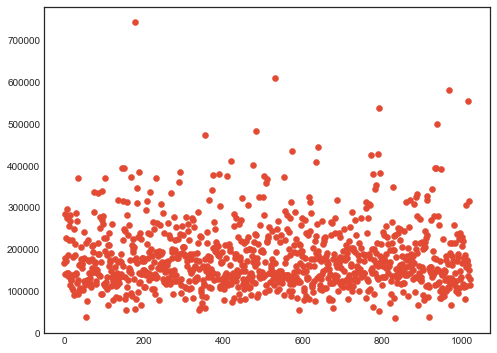

In [33]:
plt.scatter(range(0,len(train['SalePrice'])),train['SalePrice'])

(array([ 101.,  495.,  270.,   98.,   37.,   12.,    3.,    3.,    1.,    1.]),
 array([  35311. ,  106279.9,  177248.8,  248217.7,  319186.6,  390155.5,
         461124.4,  532093.3,  603062.2,  674031.1,  745000. ]),
 <a list of 10 Patch objects>)

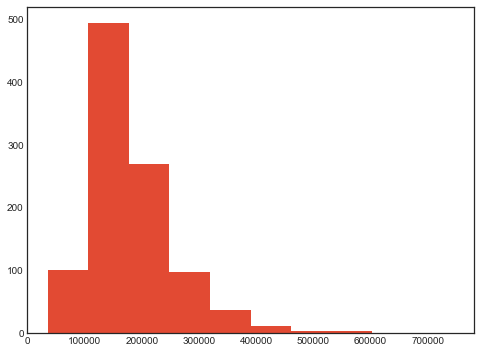

In [34]:
plt.hist(train['SalePrice'])

(array([   3.,    9.,   39.,  128.,  328.,  286.,  152.,   62.,   10.,    4.]),
 array([ 10.47194981,  10.77686878,  11.08178775,  11.38670672,
         11.69162568,  11.99654465,  12.30146362,  12.60638259,
         12.91130156,  13.21622053,  13.5211395 ]),
 <a list of 10 Patch objects>)

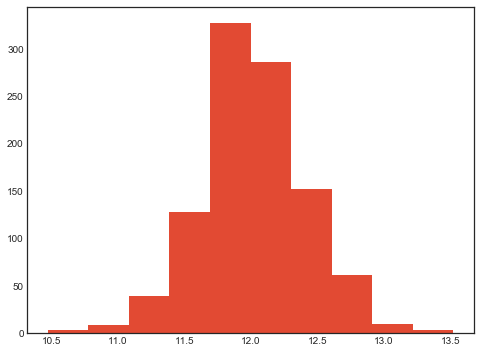

In [41]:
sale_price_norm = np.log(train['SalePrice'])
plt.hist(sale_price_norm)

35311


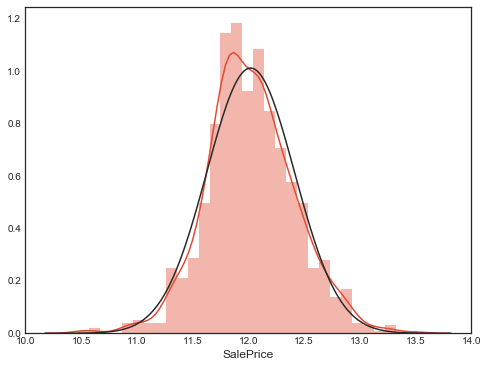

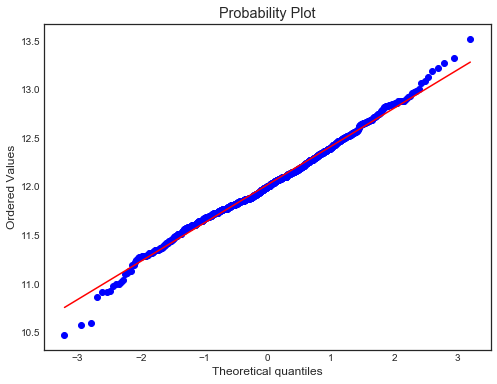

In [42]:
print(min(train['SalePrice']))

#sale_price_norm = np.log1p(train['SalePrice'])
#plt.hist(sale_price_norm)

from scipy.stats import norm
#applying log transformation
#train['SalePrice'] = np.log(df_train['SalePrice'])
#transformed histogram and normal probability plot
sns.distplot(np.log(train['SalePrice']), fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(train['SalePrice']), plot=plt)

#### Look at Missing Values

In [43]:
#Then we shall be getting the percentage of the missing values in columns of our dataset like below
percentage_missing = train.isnull().sum()/len(train)
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing.sort_values(inplace=True)#we use inplace=True to make changes to our columns
print(percentage_missing)


#    # Handle remaining missing values for numerical features by using median as replacement
#    print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
#    train_num = train_num.fillna(train_num.median())
#    print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

MasVnrType      0.005877
MasVnrArea      0.005877
BsmtQual        0.025465
BsmtCond        0.025465
BsmtFinType1    0.025465
BsmtFinType2    0.026445
BsmtExposure    0.026445
GarageCond      0.050930
GarageQual      0.050930
GarageFinish    0.050930
GarageType      0.050930
GarageYrBlt     0.050930
LotFrontage     0.179236
FireplaceQu     0.454456
Fence           0.794319
Alley           0.944172
MiscFeature     0.961802
PoolQC          0.995103
dtype: float64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

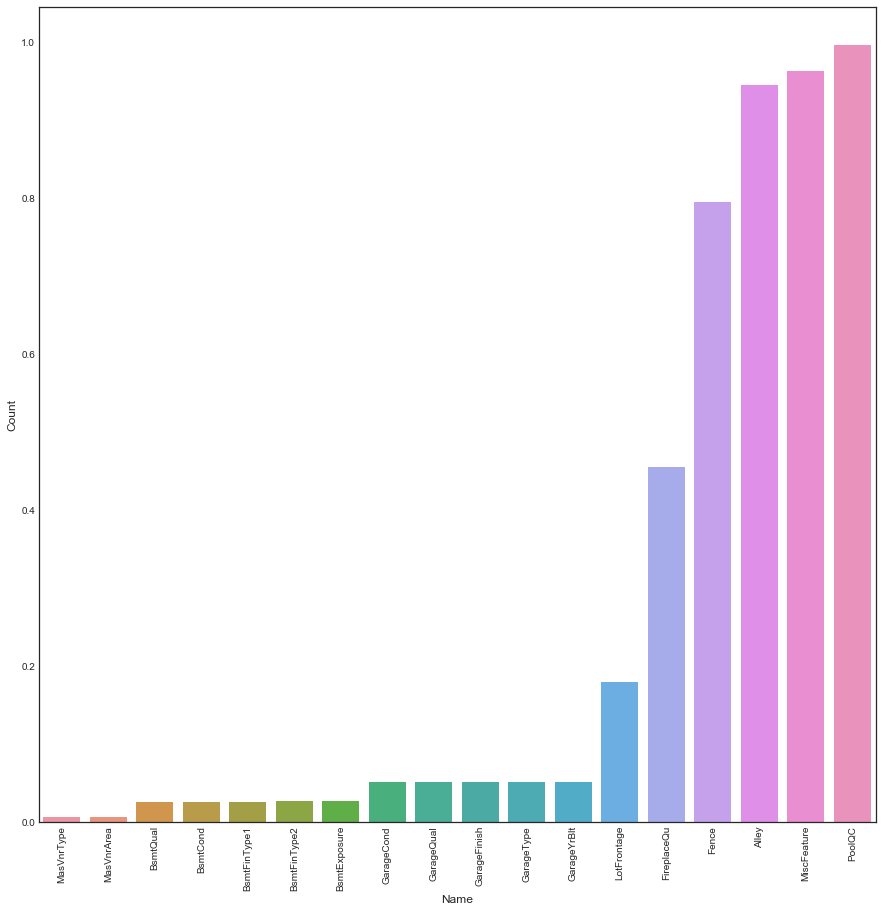

In [44]:
#lets plot to visualize the missing values
percentage_missing = percentage_missing.to_frame()
percentage_missing.columns=['Count']
percentage_missing.index.names = ['Name']
percentage_missing['Name'] = percentage_missing.index
plt.figure(figsize=(15,15))
sns.barplot(x="Name",y="Count",data=percentage_missing)
plt.xticks(rotation=90)

#missing = train.isnull().sum()
#missing = missing[missing > 0]
#missing.sort_values(inplace=True)
#missing.plot.bar()

In [45]:
# Look at the variables with high numbers of missings
for i in list(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']):
    cat_pivot = train.pivot_table(index=i,values="SalePrice",aggfunc=np.median)
    print (cat_pivot)

        SalePrice
PoolQC           
Ex         745000
Fa         181000
Gd         171000
             SalePrice
MiscFeature           
Gar2            170750
Othr             55000
Shed            146000
       SalePrice
Alley           
Grvl      115000
Pave      168600
       SalePrice
Fence           
GdPrv     170500
GdWo      137500
MnPrv     137225
MnWw      132500
             SalePrice
FireplaceQu           
Ex              311500
Fa              157500
Gd              206950
Po              131500
TA              186500


We can probably assume that the missings for PoolQC, Alley, Fence, and FireplaceQu correspond with those features being absent in a house.

### 2.3.3 Numeric Data

In [47]:
numVars = list(train.describe().columns)
print(numVars)
#quantitative = [f for f in train.columns if train.dtypes[f] != 'object']
#quantitative.remove('SalePrice')
#quantitative.remove('Id')
#OR
#numerical_data = train.select_dtypes(include=[np.number])
#categorical_data = train.select_dtypes(exclude=[np.number])
#len(quantitative)
print(len(numVars))
numVars.remove('SalePrice')
numVars.remove('Id')
print(len(numVars))
numData = train[numVars]

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
38
36


In [48]:
qualitative = [f for f in train.columns if train.dtypes[f] == 'object']
print(qualitative)
print(len(qualitative))
catData = train[qualitative]

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
43


Initial efforts will focus on examining what factors may contribute to graduation rates. Graduate rates help determine whether schools are designated as Title I schools, and thus receive significant funding for special programs to aid students and teachers. 

#### Numeric Data

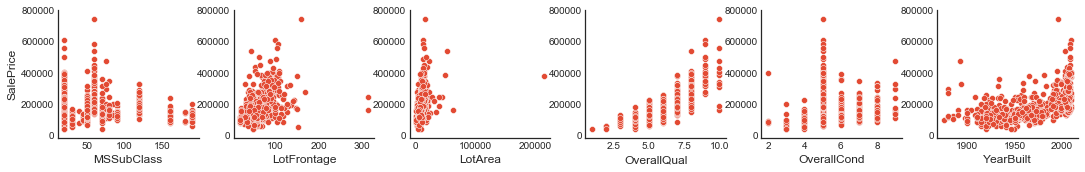

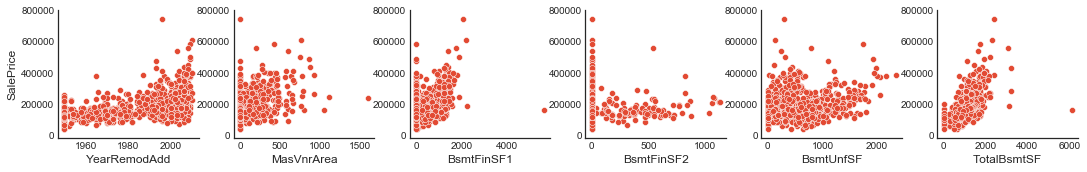

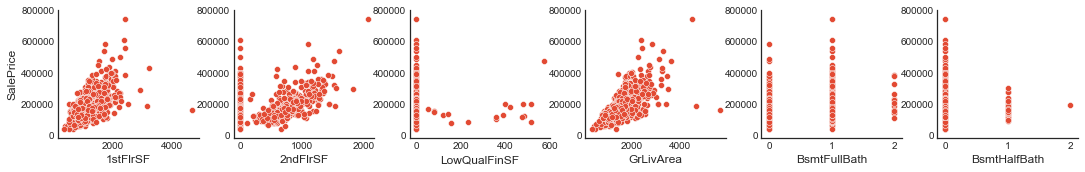

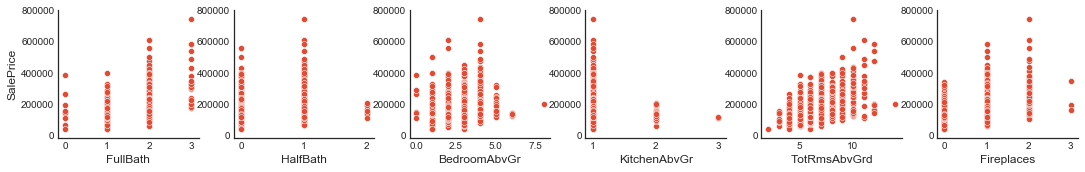

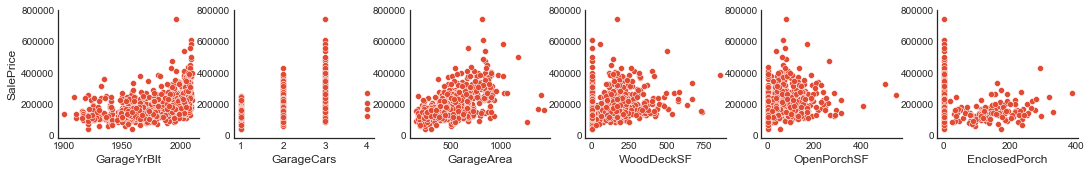

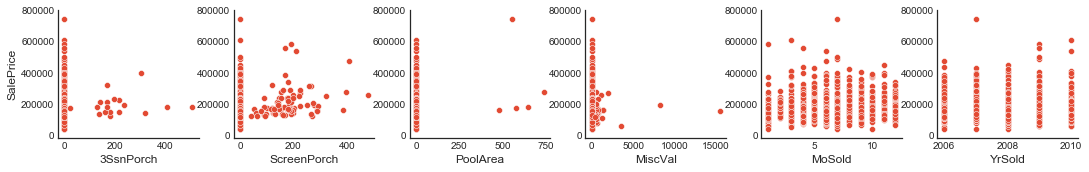

In [49]:
sns.pairplot(train[numVars[0:6] + list(["SalePrice"])].dropna(), x_vars=numVars[0:6], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[6:12] + list(["SalePrice"])].dropna(), x_vars=numVars[6:12], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[12:18] + list(["SalePrice"])].dropna(), x_vars=numVars[12:18], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[18:24] + list(["SalePrice"])].dropna(), x_vars=numVars[18:24], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[24:30] + list(["SalePrice"])].dropna(), x_vars=numVars[24:30], y_vars='SalePrice', size=2.5, diag_kind="kde")
sns.pairplot(train[numVars[30:36] + list(["SalePrice"])].dropna(), x_vars=numVars[30:36], y_vars='SalePrice', size=2.5, diag_kind="kde")

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.373626,-0.103255,0.005597,-0.072961,0.014486,0.027440,-0.027402,-0.048171,-0.084233,-0.153056,-0.233046,-0.234434,0.281092,0.055874,0.059259,0.027889,0.006339,0.102888,0.146635,-0.004496,0.288701,0.045535,-0.036081,0.063767,-0.055145,-0.106732,0.021815,0.014135,-0.029425,-0.051108,-0.008266,0.004490,-0.006668,-0.021420,-0.028886,-0.101732
LotFrontage,-0.373626,1.000000,0.435467,0.244137,-0.031078,0.121299,0.095892,0.210796,0.243094,0.054316,0.128607,0.395931,0.464002,0.093999,0.019116,0.419949,0.088842,-0.017678,0.215259,0.054894,0.258096,-0.013936,0.359546,0.264978,0.081562,0.250700,0.322623,0.059977,0.156827,-0.054228,0.083703,0.054411,0.216813,0.008084,0.008792,0.010340,0.342569
LotArea,-0.103255,0.435467,1.000000,0.095322,0.011183,0.002927,-0.000680,0.088449,0.204248,0.139353,-0.012555,0.249981,0.285387,0.061255,0.003781,0.262902,0.163583,0.046430,0.120335,0.007326,0.120648,-0.013794,0.198045,0.253788,-0.029727,0.134133,0.155291,0.145296,0.066283,-0.019195,0.013321,0.035508,0.075379,0.042480,0.010714,0.008767,0.242651
OverallQual,0.005597,0.244137,0.095322,1.000000,-0.080882,0.579946,0.569879,0.402266,0.230516,-0.079668,0.323133,0.535582,0.488616,0.259961,-0.040030,0.572183,0.090976,-0.048028,0.552704,0.249875,0.095393,-0.191354,0.416342,0.382595,0.553794,0.595769,0.551573,0.216674,0.328186,-0.132430,0.022643,0.080288,0.064370,-0.032151,0.098398,0.002367,0.787610
OverallCond,-0.072961,-0.031078,0.011183,-0.080882,1.000000,-0.395940,0.051409,-0.134866,-0.051912,0.047771,-0.122473,-0.159757,-0.114442,0.040033,0.030964,-0.049876,-0.075806,0.130206,-0.168747,-0.055563,0.037948,-0.091513,-0.045559,-0.035004,-0.342697,-0.174786,-0.135555,0.006698,-0.015015,0.084824,0.004654,0.088596,0.018904,0.062930,-0.002971,0.014853,-0.068277
YearBuilt,0.014486,0.121299,0.002927,0.579946,-0.395940,1.000000,0.592847,0.320624,0.239896,-0.055678,0.150064,0.380864,0.274969,-0.007718,-0.179933,0.182297,0.184069,-0.036021,0.444453,0.241653,-0.062570,-0.171295,0.098238,0.156104,0.825264,0.521871,0.462319,0.217487,0.196357,-0.386972,0.022938,-0.042392,0.025549,-0.026315,0.029318,-0.026893,0.512285
YearRemodAdd,0.027440,0.095892,-0.000680,0.569879,0.051409,0.592847,1.000000,0.188589,0.121076,-0.086140,0.198794,0.294721,0.255816,0.122864,-0.039440,0.287109,0.099873,-0.004014,0.436868,0.192185,-0.033202,-0.140002,0.202510,0.131044,0.637113,0.437503,0.376002,0.206045,0.243672,-0.201355,0.029988,-0.020707,0.009886,-0.012429,0.054736,0.028679,0.519485
MasVnrArea,-0.027402,0.210796,0.088449,0.402266,-0.134866,0.320624,0.188589,1.000000,0.250648,-0.097139,0.141367,0.368494,0.351644,0.143520,-0.068155,0.371533,0.061808,0.001257,0.251400,0.182491,0.107154,-0.041353,0.303507,0.253705,0.262852,0.346290,0.374316,0.133547,0.136623,-0.133332,0.025945,0.062765,0.020102,-0.028907,-0.009303,0.001888,0.434458
BsmtFinSF1,-0.048171,0.243094,0.204248,0.230516,-0.051912,0.239896,0.121076,0.250648,1.000000,-0.050354,-0.495309,0.531483,0.453131,-0.138807,-0.069762,0.218322,0.655835,0.046751,0.045849,-0.000520,-0.112206,-0.058430,0.045547,0.267817,0.136141,0.207413,0.288804,0.172825,0.107935,-0.105451,0.019881,0.057661,0.161643,0.005609,-0.011275,0.029066,0.361469
BsmtFinSF2,-0.084233,0.054316,0.139353,-0.079668,0.047771,-0.055678,-0.086140,-0.097139,-0.050354,1.000000,-0.202925,0.097809,0.076269,-0.125885,0.028008,-0.043128,0.139546,0.101937,-0.096592,-0.065242,-0.041221,-0.036911,-0.067383,0.010489,-0.097677,-0.052342,-0.030629,0.078999,-0.047818,0.043839,-0.034563,0.041678,0.014987,-0.002118,-0.009860,0.041721,-0.028977


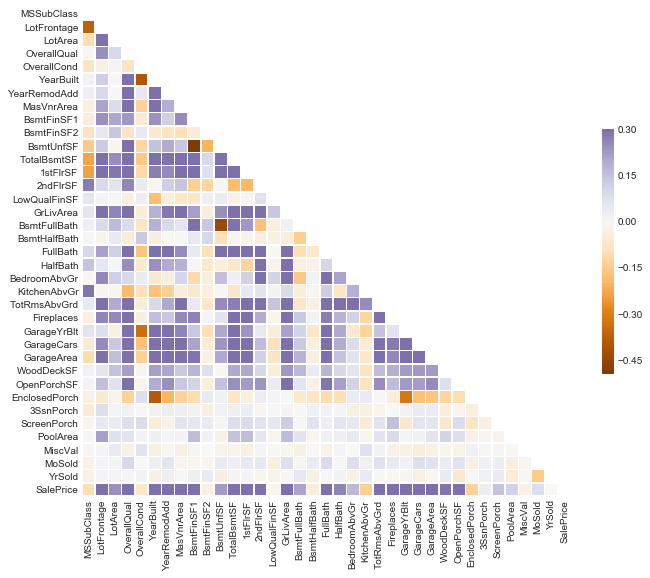

In [50]:
# Compute the correlation matrix
corr = train[numVars+list(["SalePrice"])].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

corr

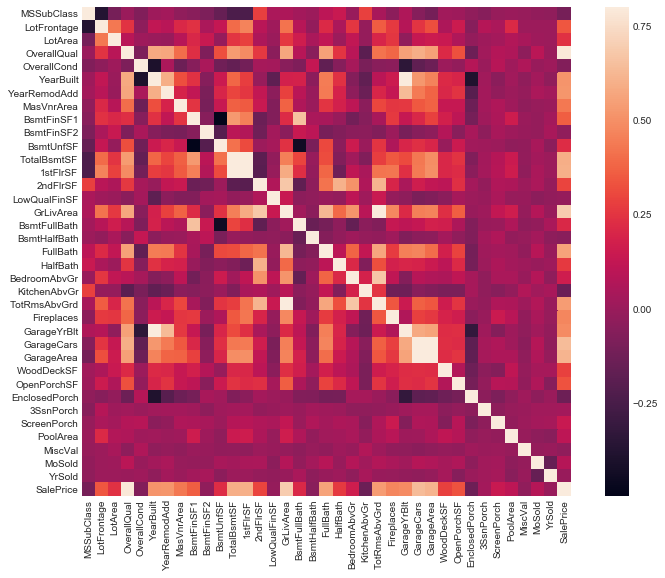

In [51]:
#correlation matrix
corrmat = train[numVars+list(['SalePrice'])].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

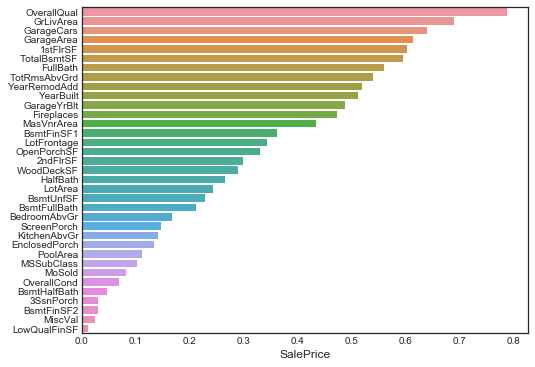

In [52]:
numTop10 = (abs(corr['SalePrice']).sort_values(ascending=False)[1:36])
#print(list(numTop10.index))

sns.barplot(y=list(numTop10.index),  x=numTop10)

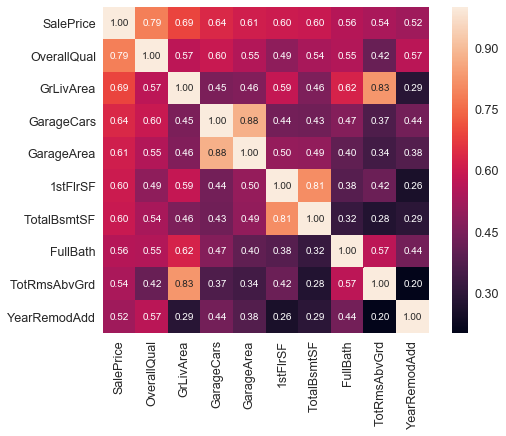

In [53]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

OverallQual     0.787610
GrLivArea       0.689907
GarageCars      0.638627
GarageArea      0.613406
1stFlrSF        0.601274
TotalBsmtSF     0.595057
FullBath        0.559954
TotRmsAbvGrd    0.538350
YearRemodAdd    0.519485
Name: SalePrice, dtype: float64


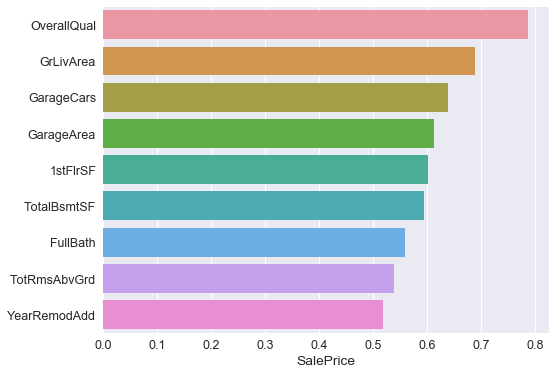

In [54]:
print(abs(corr['SalePrice']).sort_values(ascending=False)[1:10])
numTop10 = (abs(corr['SalePrice']).sort_values(ascending=False)[1:10])
#print(list(numTop10.index))

sns.barplot(y=list(numTop10.index),  x=numTop10)

In [55]:
corr2 = train[numTop10.index].corr()
#for i in range(1,len(numTop10)+1):
#        print (abs(cm[numTop10.index[i]]).sort_values(ascending=False)[1])

print(corr2>0.6)

for i in range(0,len(corr2)):
    print (corr2[numTop10.index[i]]).sort_values(ascending=False)[1]

              OverallQual  GrLivArea  GarageCars  GarageArea  1stFlrSF  \
OverallQual          True      False       False       False     False   
GrLivArea           False       True       False       False     False   
GarageCars          False      False        True        True     False   
GarageArea          False      False        True        True     False   
1stFlrSF            False      False       False       False      True   
TotalBsmtSF         False      False       False       False      True   
FullBath            False       True       False       False     False   
TotRmsAbvGrd        False       True       False       False     False   
YearRemodAdd        False      False       False       False     False   

              TotalBsmtSF  FullBath  TotRmsAbvGrd  YearRemodAdd  
OverallQual         False     False         False         False  
GrLivArea           False      True          True         False  
GarageCars          False     False         False         Fal

OverallQual: max corr = 0.59 (include)

GrLivArea: Correlated with FullBath (0.64) and TotRmsAbvGrd (0.83); remove TotRmsAbvGrd

TotalBsmtSF: correlated with 1stFlrSF (0.79); remove 1stFlrSF

GarageCars: correlated with GarageArea (0.89); remove GarageArea

FullBath: max corr = 0.64

YearBuilt: max corr = 0.57

In [56]:
numSelect = list(numTop10.index)
numSelect.remove('TotRmsAbvGrd')
numSelect.remove('1stFlrSF')
numSelect.remove('GarageArea')

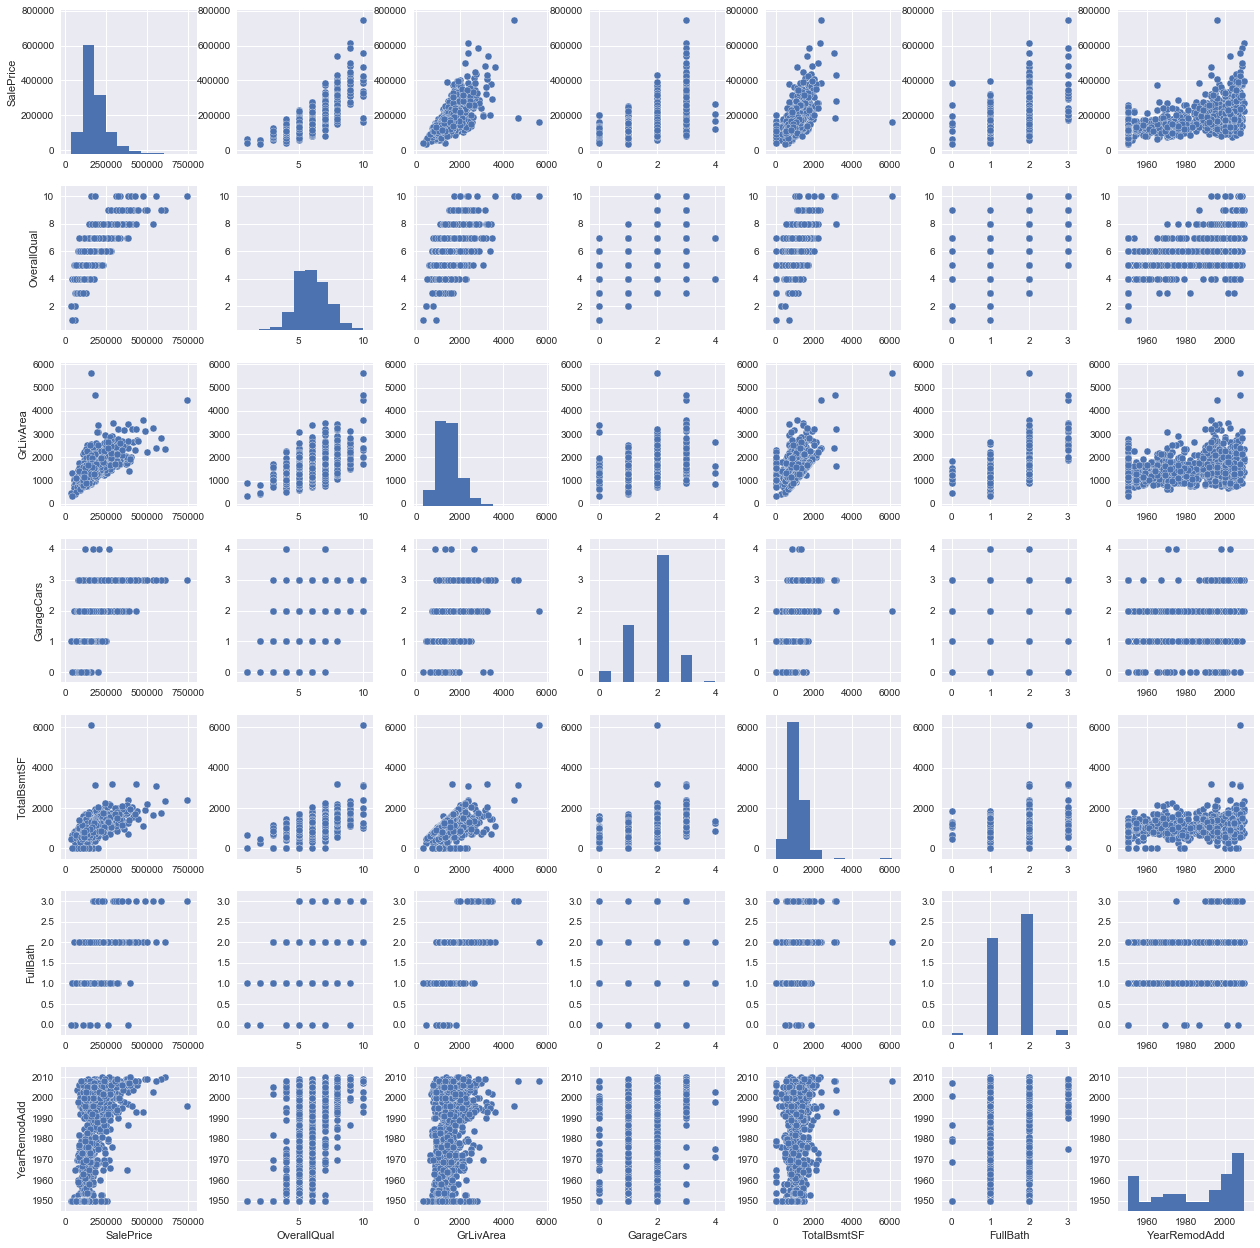

In [57]:
#scatterplot
sns.set()
#numVars_sub = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF', 'YearBuilt']
#sns.pairplot(train[numVars_sub], size = 2.5)
sns.pairplot(train[list(['SalePrice'])+numSelect], size = 2.5)
plt.show();

### 2.3.4 Categorical Data

In [61]:
catData.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1021,1021,57,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1021,1015,1021,1021,1021,995,995,994,995,994,1021,1021,1021,1021,1021,1021,557,969,969,969,969,1021,5,210,39,1021,1021
unique,5,2,2,4,4,1,5,3,25,9,8,5,8,6,8,13,15,4,4,5,6,4,4,4,6,6,5,4,2,4,4,7,5,6,3,5,5,3,3,4,3,9,5
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,810,1016,33,657,905,1021,744,963,158,878,1007,849,520,800,1002,362,356,606,635,896,452,453,921,650,303,877,998,510,954,936,523,955,278,613,414,919,927,936,3,118,36,883,835


In [62]:
for c in list(catData.columns.values):
    train[c] = train[c].astype('category')
    if train[c].isnull().any():
        train[c] = train[c].cat.add_categories(['MISSING'])
        train[c] = train[c].fillna('MISSING')

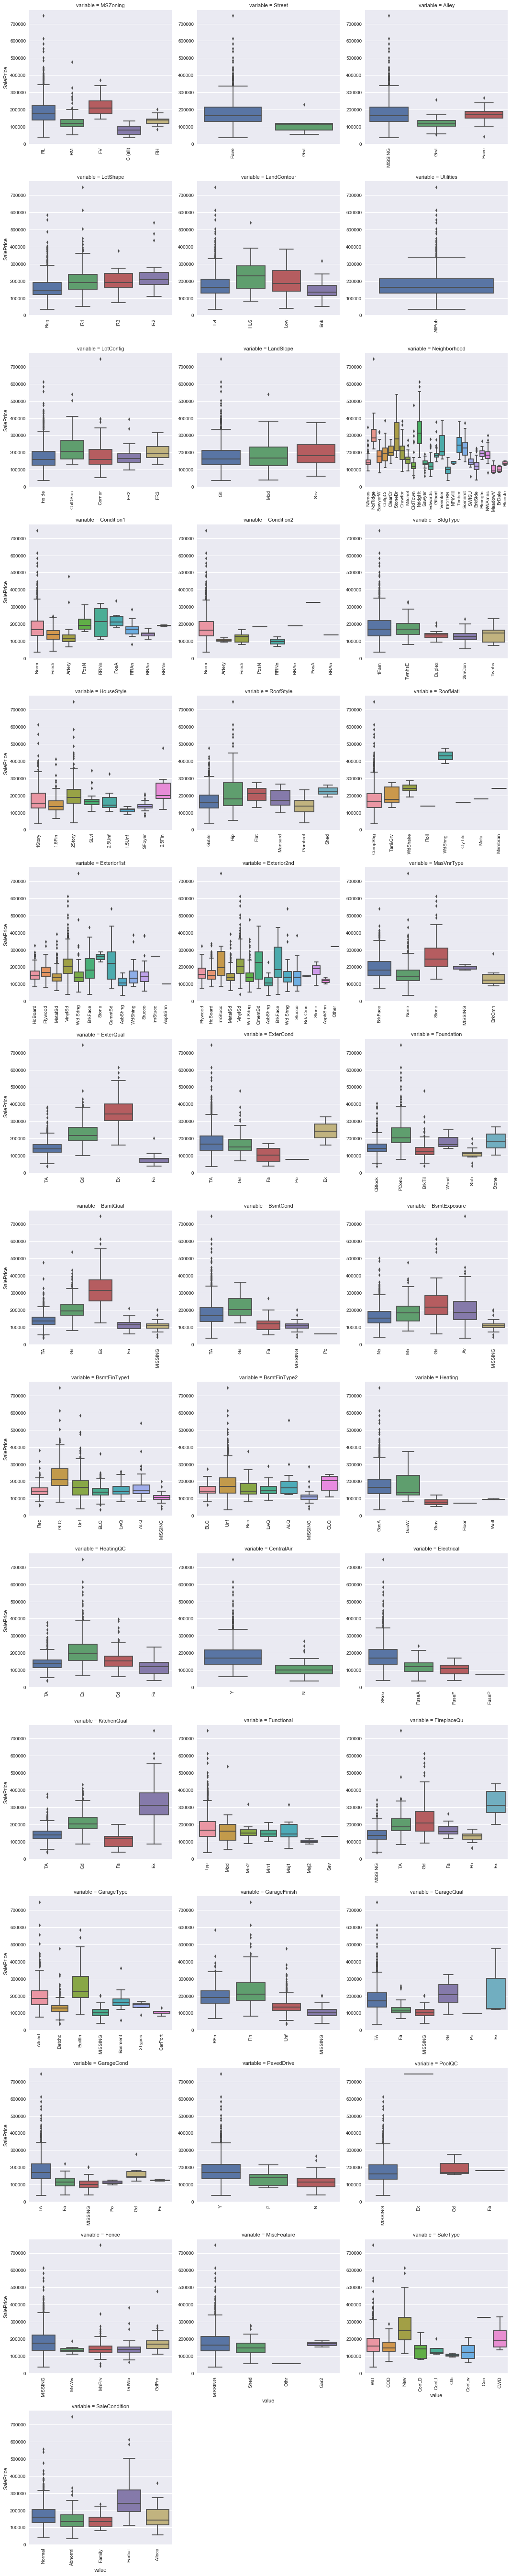

In [63]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train, id_vars=['SalePrice'], value_vars=list(catData.columns.values))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

Important-looking variables:

Plot variable importance (ANOVA)

Here is quick estimation of influence of categorical variable on SalePrice. For each variable SalePrices are partitioned to distinct sets based on category values. Then check with ANOVA test if sets have similar distributions. If variable has minor impact then set means should be equal. Decreasing pval is sign of increasing diversity in partitions.

c:\python27\lib\site-packages\scipy\stats\stats.py:2924: RuntimeWarning: invalid value encountered in double_scalars
  msb = ssbn / float(dfbn)


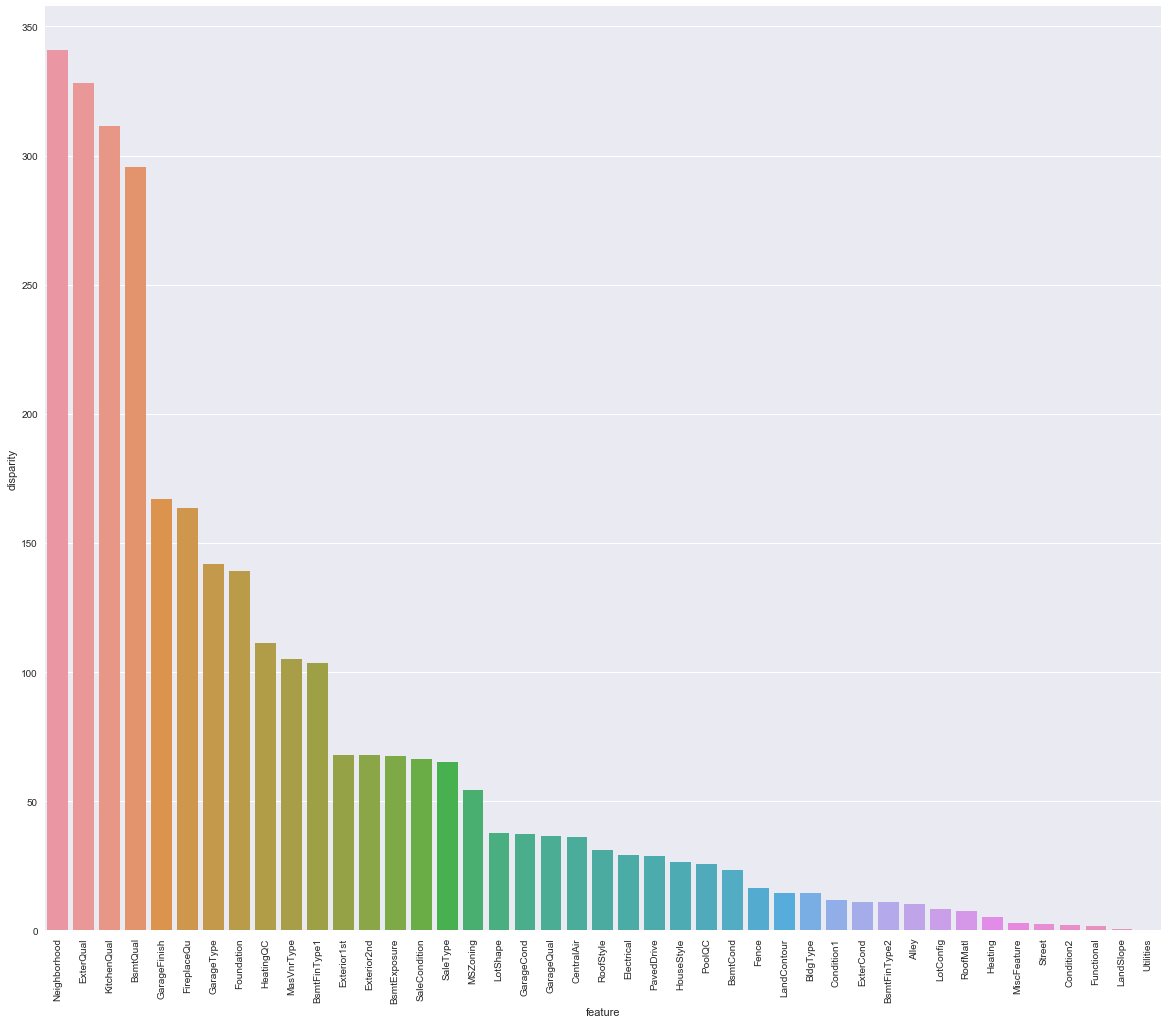

In [64]:
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = list(catData.columns.values)
    pvals = []
    for c in list(catData.columns.values):
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = stats.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
fig, ax = plt.subplots(figsize=(20,17))
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [65]:
a_sub = a[a['disparity']>90]
print(a_sub)

         feature           pval   disparity
8   Neighborhood  1.017105e-148  340.765634
18     ExterQual  2.677525e-143  328.284775
30   KitchenQual  5.089350e-136  311.524423
21      BsmtQual  3.937689e-129  295.662883
34  GarageFinish   2.456914e-73  167.189806
32   FireplaceQu   8.865292e-72  163.603983
33    GarageType   2.776186e-62  141.739198
20    Foundation   4.106332e-61  139.045161
27     HeatingQC   5.635697e-49  111.097549
17    MasVnrType   2.189351e-46  105.135309
24  BsmtFinType1   1.227870e-45  103.411048


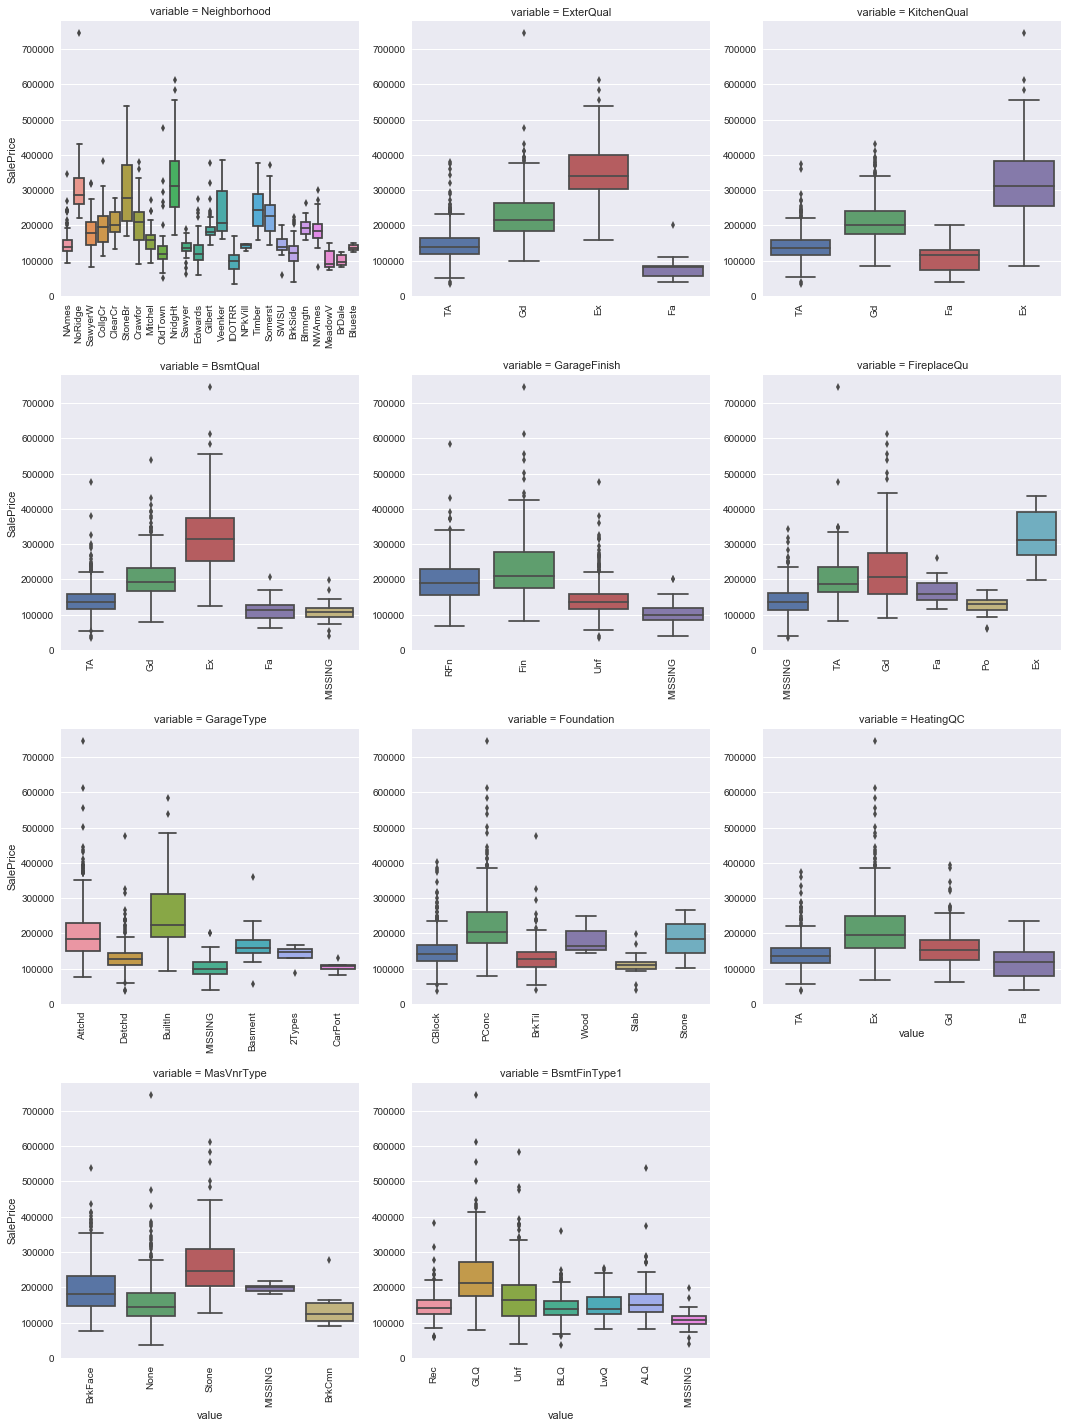

In [66]:
cat_sub = train[list(a_sub['feature'])+list(['SalePrice'])]
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(cat_sub, id_vars=['SalePrice'], value_vars=list(a_sub['feature']))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

In [67]:
quality_vars = list(['ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC'])
for i in quality_vars:
    cat_pivot = train.pivot_table(index=i,values="SalePrice",aggfunc=np.median)
    print (cat_pivot)

           SalePrice
ExterQual           
Ex            341250
Fa             81000
Gd            216837
TA            139400
             SalePrice
KitchenQual           
Ex              312436
Fa              115000
Gd              202500
TA              137000
          SalePrice
BsmtQual           
Ex           314813
Fa           112000
Gd           192500
TA           135500
MISSING      107750
             SalePrice
FireplaceQu           
Ex              311500
Fa              157500
Gd              206950
Po              131500
TA              186500
MISSING         134950
           SalePrice
HeatingQC           
Ex            194850
Fa            120000
Gd            153250
TA            135000


## 3) Data Preparation

Create a subset of the master data frame (train and test sets) with only the features of interest

In [148]:
featSelect = list(numSelect) + list(cat_sub)
print(featSelect)

['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearRemodAdd', 'Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'FireplaceQu', 'GarageType', 'Foundation', 'HeatingQC', 'MasVnrType', 'BsmtFinType1', 'SalePrice']


In [153]:
features = features[featSelect]
features.head()

OverallQual  GrLivArea  GarageCars  TotalBsmtSF  FullBath  \
train 0            7       1710         2.0        856.0         2   
      1            6       1262         2.0       1262.0         2   
      2            7       1786         2.0        920.0         2   
      3            7       1717         3.0        756.0         1   
      4            8       2198         3.0       1145.0         2   

         YearRemodAdd Neighborhood ExterQual KitchenQual BsmtQual  \
train 0          2003      CollgCr        Gd          Gd       Gd   
      1          1976      Veenker        TA          TA       Gd   
      2          2002      CollgCr        Gd          Gd       Gd   
      3          1970      Crawfor        TA          Gd       TA   
      4          2000      NoRidge        Gd          Gd       Gd   

        GarageFinish FireplaceQu GarageType Foundation HeatingQC MasVnrType  \
train 0          RFn         NaN     Attchd      PConc        Ex    BrkFace   
      1          RFn          TA     Attchd     CBlock        Ex       None   
      2          RFn          TA     Attchd      PConc        Ex    BrkFace   
      3          Unf          Gd     Detchd     BrkTil        Gd       None   
      4          RFn          TA     Attchd      PConc        Ex    BrkFace   

        BsmtFinType1  SalePrice  
train 0          GLQ   208500.0  
      1          ALQ   181500.0  
      2          GLQ   223500.0  
      3          ALQ   140000.0  
      4          GLQ   250000.0

### 3.1 Categorical Features

Categorical Features of interest:

In [154]:
print(list(cat_sub.columns.values))

['Neighborhood', 'ExterQual', 'KitchenQual', 'BsmtQual', 'GarageFinish', 'FireplaceQu', 'GarageType', 'Foundation', 'HeatingQC', 'MasVnrType', 'BsmtFinType1', 'SalePrice']


### Creation of Ordinal Variables (Enumeration)

In [155]:
print(list(quality_vars))

['ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC']


Replace all Na, NaN values with MISSING category for later processing

In [156]:
#for c in list(catData.columns.values):
for c in list(features.columns.values):
    features[c] = features[c].astype('category')
    if features[c].isnull().any():
        features[c] = features[c].cat.add_categories(['MISSING'])
        features[c] = features[c].fillna('MISSING')

(5) Ex - Excellent

(4) Gd - Good

(3) TA - Average/Typical

(2) Fa - Fair

(1) Po - Poor

(NA) Missing

In [161]:
enumList = list()
for i in range(0,len(features)):
    if (features['ExterQual'].iloc[i]=='Ex'):
        enumList.append(5)
    if (features['ExterQual'].iloc[i]=='Gd'):
        enumList.append(4)
    if (features['ExterQual'].iloc[i]=='TA'):
        enumList.append(3)
    if (features['ExterQual'].iloc[i]=='Fa'):
        enumList.append(2)
    if (features['ExterQual'].iloc[i]=='Po'):
        enumList.append(1)
    if (features['ExterQual'].iloc[i]=='MISSING'):
        enumList.append(np.nan)
        
print(np.unique(enumList, return_counts=True))
print(np.unique(features['ExterQual'], return_counts=True))

#train['BsmtQual'][pd.isnull(train['BsmtQual'])]='MISSING'
#train['FireplaceQu'][pd.isnull(train['FireplaceQu'])]='MISSING'

for j in quality_vars:
    enumList = list()
    for i in range(0,len(features)):
        if (features[j].iloc[i]=='Ex'):
            enumList.append(5)
        if (features[j].iloc[i]=='Gd'):
            enumList.append(4)
        if (features[j].iloc[i]=='TA'):
            enumList.append(3)
        if (features[j].iloc[i]=='Fa'):
            enumList.append(2)
        if (features[j].iloc[i]=='Po'):
            enumList.append(1)
        if (features[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (features[j].iloc[i]=='nan'):
            enumList.append(0)
    features[j+'_E'] = enumList
    
    
#qual_dict={np.nan:0,"Po":1,"Fa":2,"TA":3,"Gd":4,"Ex":5}
#name = np.array(['ExterQual','PoolQC' ,'ExterCond','BsmtQual','BsmtCond',\
#                 'HeatingQC','KitchenQual','FireplaceQu', 'GarageQual','GarageCond'])
#for i in name:
#malldata.head()

(array([2, 3, 4, 5]), array([  35, 1798,  979,  107], dtype=int64))
(array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object), array([ 107,   35,  979, 1798], dtype=int64))


In [162]:
for j in list(['GarageFinish']):
    enumList = list()
    for i in range(0,len(features)):
        if (features[j].iloc[i]=='Fin'):
            enumList.append(3)
        if (features[j].iloc[i]=='RFn'):
            enumList.append(2)
        if (features[j].iloc[i]=='Unf'):
            enumList.append(1)
        if (features[j].iloc[i]=='MISSING'):
            enumList.append(0)
        if (features[j].iloc[i]=='nan'):
            enumList.append(0)
    features[j+'_E'] = enumList

In [168]:
quality_vars

['ExterQual', 'KitchenQual', 'BsmtQual', 'FireplaceQu', 'HeatingQC']

In [169]:
features = features.drop(quality_vars, axis=1)
features = features.drop('GarageFinish', axis=1)

In [170]:
features.head()

OverallQual GrLivArea GarageCars TotalBsmtSF FullBath YearRemodAdd  \
train 0           7      1710          2         856        2         2003   
      1           6      1262          2        1262        2         1976   
      2           7      1786          2         920        2         2002   
      3           7      1717          3         756        1         1970   
      4           8      2198          3        1145        2         2000   

        Neighborhood GarageType Foundation MasVnrType BsmtFinType1 SalePrice  \
train 0      CollgCr     Attchd      PConc    BrkFace          GLQ    208500   
      1      Veenker     Attchd     CBlock       None          ALQ    181500   
      2      CollgCr     Attchd      PConc    BrkFace          GLQ    223500   
      3      Crawfor     Detchd     BrkTil       None          ALQ    140000   
      4      NoRidge     Attchd      PConc    BrkFace          GLQ    250000   

         ExterQual_E  KitchenQual_E  BsmtQual_E  FireplaceQu_E  HeatingQC_E  \
train 0            4              4           4              0            5   
      1            3              3           4              3            5   
      2            4              4           4              3            5   
      3            3              4           3              4            4   
      4            4              4           4              3            5   

         GarageFinish_E  
train 0               2  
      1               2  
      2               2  
      3               1  
      4               2

### Creation of dummy variables

In [171]:
for i in list(['Neighborhood', 'Foundation', 'GarageType', 'BsmtFinType1', 'MasVnrType']):
    cat_pivot = train.pivot_table(index=i,values="SalePrice",aggfunc=np.median)
    print (cat_pivot)

              SalePrice
Neighborhood           
Blmngtn          191000
Blueste          137500
BrDale           106000
BrkSide          124300
ClearCr          200250
CollgCr          197200
Crawfor          200624
Edwards          121750
Gilbert          181000
IDOTRR           103000
MeadowV           88000
Mitchel          153500
NAmes            140000
NPkVill          146000
NWAmes           182900
NoRidge          301500
NridgHt          315000
OldTown          119000
SWISU            139500
Sawyer           135000
SawyerW          179900
Somerst          225500
StoneBr          278000
Timber           228475
Veenker          218000
            SalePrice
Foundation           
BrkTil         125250
CBlock         141500
PConc          205000
Slab           104150
Stone          126500
Wood           164000
            SalePrice
GarageType           
2Types         159000
Attchd         185000
Basment        148000
BuiltIn        227500
CarPort        108000
Detchd         129500


Let's keep Neighborhood, as it is the mostly highly correlated to Sale Price, and turn into dummies

In [212]:
features = features.drop('Foundation', axis=1)
features = features.drop('GarageType', axis=1)
features = features.drop('BsmtFinType1', axis=1)
features = features.drop('MasVnrType', axis=1)

In [172]:
one_hot = pd.get_dummies(features['Neighborhood'])
features = features.drop('Neighborhood', axis=1)
features = features.join(one_hot)
print(features.shape)
features.describe()

(2919, 42)


,ExterQual_E,KitchenQual_E,BsmtQual_E,FireplaceQu_E,HeatingQC_E,GarageFinish_E,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,3.396711,3.509764,3.477561,1.768071,4.151764,1.715999,0.009592,0.003426,0.010277,0.036999,0.015074,0.091470,0.035286,0.066461,0.056526,0.031860,0.012676,0.039054,0.151764,0.007879,0.044878,0.024323,0.056869,0.081877,0.016444,0.051730,0.042823,0.062350,0.017472,0.024666,0.008222
std,0.580293,0.665273,0.905448,1.806619,0.957952,0.897327,0.097486,0.058440,0.100873,0.188792,0.121867,0.288325,0.184534,0.249129,0.230975,0.175658,0.111889,0.193758,0.358854,0.088431,0.207072,0.154078,0.231631,0.274225,0.127197,0.221519,0.202492,0.241832,0.131043,0.155132,0.090317
min,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,3.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,4.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,4.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [213]:
print(features.shape)
features.head()

(2918, 38)


OverallQual GrLivArea GarageCars TotalBsmtSF FullBath YearRemodAdd  \
train 0           7      1710          2         856        2         2003   
      1           6      1262          2        1262        2         1976   
      2           7      1786          2         920        2         2002   
      3           7      1717          3         756        1         1970   
      4           8      2198          3        1145        2         2000   

        SalePrice  ExterQual_E  KitchenQual_E  BsmtQual_E  FireplaceQu_E  \
train 0    208500            4              4           4              0   
      1    181500            3              3           4              3   
      2    223500            4              4           4              3   
      3    140000            3              4           3              4   
      4    250000            4              4           4              3   

         HeatingQC_E  GarageFinish_E  Blmngtn  Blueste  BrDale  BrkSide  \
train 0            5               2        0        0       0        0   
      1            5               2        0        0       0        0   
      2            5               2        0        0       0        0   
      3            4               1        0        0       0        0   
      4            5               2        0        0       0        0   

         ClearCr  CollgCr  Crawfor  Edwards  Gilbert  IDOTRR  MeadowV  \
train 0        0        1        0        0        0       0        0   
      1        0        0        0        0        0       0        0   
      2        0        1        0        0        0       0        0   
      3        0        0        1        0        0       0        0   
      4        0        0        0        0        0       0        0   

         Mitchel  NAmes  NPkVill  NWAmes  NoRidge  NridgHt  OldTown  SWISU  \
train 0        0      0        0       0        0        0        0      0   
      1        0      0        0       0        0        0        0      0   
      2        0      0        0       0        0        0        0      0   
      3        0      0        0       0        0        0        0      0   
      4        0      0        0       0        1        0        0      0   

         Sawyer  SawyerW  Somerst  StoneBr  Timber  Veenker  
train 0       0        0        0        0       0        0  
      1       0        0        0        0       0        1  
      2       0        0        0        0       0        0  
      3       0        0        0        0       0        0  
      4       0        0        0        0       0        0

### MISSINGS / IMPUTATION

In [214]:
print("Missings or NAs in numeric variables:")
print(" ")
num_missing = features.isnull().sum()
print(num_missing)

print(" ")
print("Missings or NAs in categoric variables:")
print(" ")
for i in list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'GarageFinish_E']):
    print(i + ": ")
    print((features[i]==0).sum())

Missings or NAs in numeric variables:
 
OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
FullBath          0
YearRemodAdd      0
SalePrice         0
ExterQual_E       0
KitchenQual_E     0
BsmtQual_E        0
FireplaceQu_E     0
HeatingQC_E       0
GarageFinish_E    0
Blmngtn           0
Blueste           0
BrDale            0
BrkSide           0
ClearCr           0
CollgCr           0
Crawfor           0
Edwards           0
Gilbert           0
IDOTRR            0
MeadowV           0
Mitchel           0
NAmes             0
NPkVill           0
NWAmes            0
NoRidge           0
NridgHt           0
OldTown           0
SWISU             0
Sawyer            0
SawyerW           0
Somerst           0
StoneBr           0
Timber            0
Veenker           0
dtype: int64
 
Missings or NAs in categoric variables:
 
ExterQual_E: 
0
KitchenQual_E: 
0
BsmtQual_E: 
81
GarageFinish_E: 
159


Upon closer inspection, we see that the missing values (now 0's) only occur in Kitchen Quality, Basement Quality, and Garage Finish variables. Are these truely missing, or could it be that there are just no basements and garages for these homes?

Let's start by removing the single row that has a missing Kitchen Quality variable - likely insignificant

In [197]:
print(features.shape)
features = features.drop(features[features['KitchenQual_E'] == 0].index)
print(features.shape)

(2918, 42)
(2918, 42)


In [216]:
bsmtqual_0 = features['TotalBsmtSF'][features['BsmtQual_E']==0]
print(bsmtqual_0['train'])
print(bsmtqual_0['test'])

17      0
39      0
90      0
102     0
156     0
182     0
259     0
342     0
362     0
371     0
392     0
520     0
532     0
533     0
553     0
646     0
705     0
736     0
749     0
778     0
868     0
894     0
897     0
984     0
1000    0
1011    0
1035    0
1045    0
1048    0
1049    0
1090    0
1179    0
1216    0
1218    0
1232    0
1321    0
1412    0
Name: TotalBsmtSF, dtype: category
Categories (1059, object): [0, 105, 160, 173, ..., 3206, 5095, 6110, MISSING]
125           0
133           0
269           0
318           0
354           0
387           0
388           0
396           0
397           0
398           0
400           0
455           0
590           0
606           0
608           0
660     MISSING
662           0
728           0
729           0
730           0
733           0
756           0
757         173
758         356
764           0
927           0
975           0
992           0
993           0
1030          0
1038          0
1087          0
1092 

In [211]:
bsmtqual_0 = train['GarageArea'][train['GarageFinish_E']==0]
print(bsmtqual_0['train'])
print(bsmtqual_0['test'])

KeyError: 'GarageFinish_E'

No basements in these homes!

In [62]:
train['GarageFinish_E'][train['GarageArea']==0]

148     0
1218    0
434     0
843     0
710     0
750     0
108     0
375     0
464     0
784     0
441     0
163     0
613     0
1449    0
738     0
165     0
1257    0
705     0
976     0
99      0
954     0
1337    0
1030    0
528     0
562     0
921     0
1123    0
1137    0
1325    0
1219    0
614     0
88      0
1326    0
582     0
287     0
1323    0
1283    0
535     0
968     0
386     0
127     0
636     0
1173    0
495     0
649     0
1407    0
39      0
638     0
960     0
1143    0
210     0
250     0
1009    0
198     0
291     0
970     0
533     0
1011    0
125     0
1096    0
Name: GarageFinish_E, dtype: int64

No garages in these homes!

Let's keep both of these missings as 0's as they line up with the trends we see in Sale Price

#### OUTLIERS

No obvious outliers seen in numeric variables pairplots above. Otherwise, would remove individual rows containing outliers.

#### NORMALIZATION OF SKEWED

In [ ]:
## Standardizing numeric features
numeric_features = features.loc[:,['LotFrontage', 'LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

ax = sns.pairplot(numeric_features_standardized)

In [ ]:
log

In [ ]:
#    from scipy.stats import skew 
#    skewness = train_num.apply(lambda x: skew(x))
#   skewness.sort_values(ascending=False)

#    skewness = skewness[abs(skewness)>0.5]
#    skewness.index

#    skew_features = train[skewness.index]
#    skew_features.columns

#    #we can treat skewness of a feature with the help fof log transformation.so we'll apply the same here.
#    skew_features = np.log1p(skew_features)

In [ ]:
np.log(train['SalePrice'])



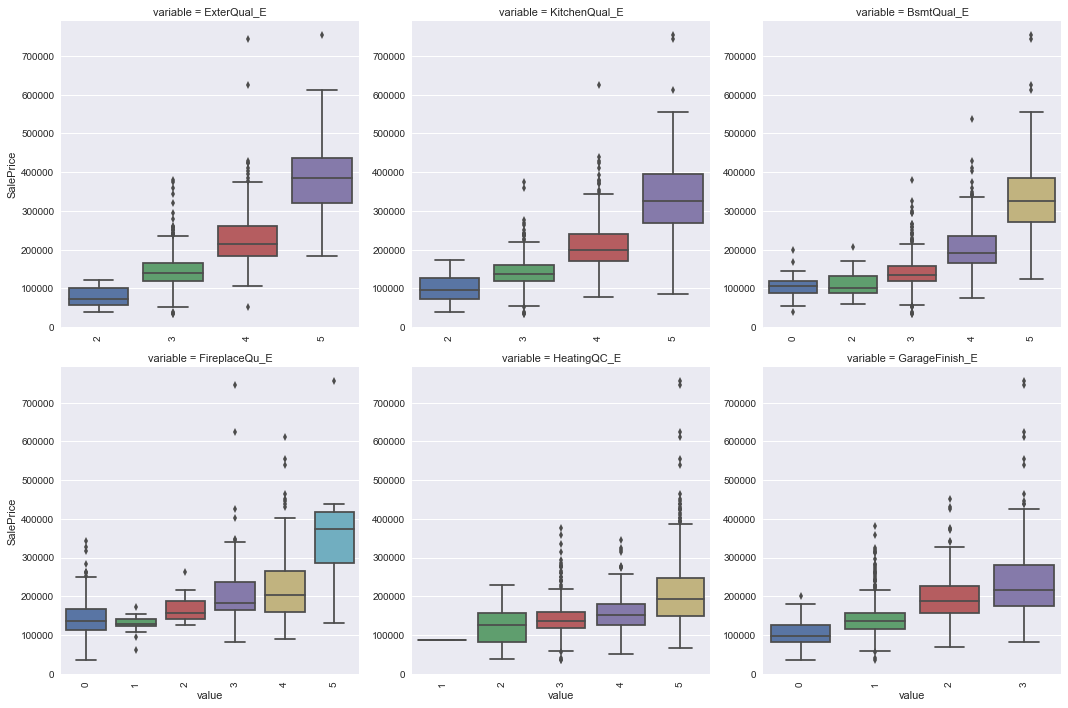

In [35]:
f = pd.melt(train, id_vars=['SalePrice'], value_vars=list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E']))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

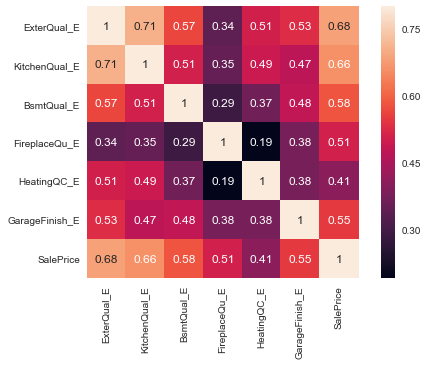

In [36]:
#correlation matrix
corrmat = train[list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'FireplaceQu_E', 'HeatingQC_E', 'GarageFinish_E'])+list(['SalePrice'])].corr()
f, ax = plt.subplots(figsize=(8, 5))
hm = sns.heatmap(corrmat, vmax=.8, square=True, annot=True);
plt.show()

In [37]:
#corr2 = train[numTop10.index].corr()
print(corrmat>0.6)

                ExterQual_E  KitchenQual_E  BsmtQual_E  FireplaceQu_E  \
ExterQual_E            True           True       False          False   
KitchenQual_E          True           True       False          False   
BsmtQual_E            False          False        True          False   
FireplaceQu_E         False          False       False           True   
HeatingQC_E           False          False       False          False   
GarageFinish_E        False          False       False          False   
SalePrice              True           True       False          False   

                HeatingQC_E  GarageFinish_E  SalePrice  
ExterQual_E           False           False       True  
KitchenQual_E         False           False       True  
BsmtQual_E            False           False      False  
FireplaceQu_E         False           False      False  
HeatingQC_E            True           False      False  
GarageFinish_E        False            True      False  
SalePrice       

Keep External, Kitchen and Basement quality metrics. Discard Fireplace and Heating quality.

In [47]:
varFinal = numSelect + list(['ExterQual_E', 'KitchenQual_E', 'BsmtQual_E', 'GarageFinish_E']) + list(['Neighborhood'])
trainF = train[varFinal + list(['SalePrice'])]
trainF.describe()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,FullBath,YearBuilt,ExterQual_E,KitchenQual_E,BsmtQual_E,GarageFinish_E,SalePrice
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,6.088149,1500.682664,1041.706170,1.766895,1.564153,1971.630754,3.399608,3.515181,3.479922,1.728697,180316.541626
std,1.378429,515.014060,407.993546,0.749196,0.552222,29.664427,0.567899,0.657546,0.874944,0.903072,79629.881143
min,1.000000,334.000000,0.000000,0.000000,0.000000,1875.000000,2.000000,2.000000,0.000000,0.000000,34900.000000
25%,5.000000,1128.000000,784.000000,1.000000,1.000000,1954.000000,3.000000,3.000000,3.000000,1.000000,130000.000000
50%,6.000000,1442.000000,983.000000,2.000000,2.000000,1972.000000,3.000000,3.000000,4.000000,2.000000,163000.000000
75%,7.000000,1756.000000,1286.000000,2.000000,2.000000,2000.000000,4.000000,4.000000,4.000000,2.000000,212900.000000
max,10.000000,4476.000000,3200.000000,4.000000,3.000000,2010.000000,5.000000,5.000000,5.000000,3.000000,755000.000000


## MODELING

In [ ]:
import copy
X_train_rare = copy.copy(X_train)
X_test_rare = copy.copy(X_test)
X_train_rare["test"]=0
X_test_rare["test"]=1
temp_df = pandas.concat([X_train_rare,X_test_rare],axis=0)
names = list(X_train_rare.columns.values)
temp_df = pandas.concat([X_train_rare,X_test_rare],axis=0)
for i in names:
    temp_df.loc[temp_df[i].value_counts()[temp_df[i]].values < 20, i] = "RARE_VALUE"
for i in range(temp_df.shape[1]):
    temp_df.iloc[:,i]=temp_df.iloc[:,i].astype('str')
X_train_rare = temp_df[temp_df["test"]=="0"].iloc[:,:-1].values
X_test_rare = temp_df[temp_df["test"]=="1"].iloc[:,:-1].values
for i in range(X_train_rare.shape[1]):
    le = preprocessing.LabelEncoder()
    le.fit(temp_df.iloc[:,:-1].iloc[:, i])
    les.append(le)
    X_train_rare[:, i] = le.transform(X_train_rare[:, i])
    X_test_rare[:, i] = le.transform(X_test_rare[:, i])
enc.fit(X_train_rare)
X_train_rare = enc.transform(X_train_rare)
X_test_rare = enc.transform(X_test_rare)
l.fit(X_train_rare,y_train)
y_pred = l.predict_proba(X_test_rare)
print(log_loss(y_test,y_pred))
r.fit(X_train_rare,y_train)
y_pred = r.predict_proba(X_test_rare)
print(log_loss(y_test,y_pred))
print(X_train_rare.shape)

XGBoost, Ridge, Lasso and Elastic-Net regularization
https://www.kaggle.com/tannercarbonati/detailed-data-analysis-ensemble-modeling

### Lasso Model

In [ ]:
def error(actual, predicted):
    actual = np.log(actual)
    predicted = np.log(predicted)
    return np.sqrt(np.sum(np.square(actual-predicted))/len(actual))

def log_transform(feature):
    train[feature] = np.log1p(train[feature].values)

def quadratic(feature):
    train[feature+'2'] = train[feature]**2
    
log_transform('GrLivArea')
log_transform('1stFlrSF')
log_transform('2ndFlrSF')
log_transform('TotalBsmtSF')
log_transform('LotArea')
log_transform('LotFrontage')
log_transform('KitchenAbvGr')
log_transform('GarageArea')

quadratic('OverallQual')
quadratic('YearBuilt')
quadratic('YearRemodAdd')
quadratic('TotalBsmtSF')
quadratic('2ndFlrSF')
quadratic('Neighborhood_E')
quadratic('RoofMatl_E')
quadratic('GrLivArea')

qdr = ['OverallQual2', 'YearBuilt2', 'YearRemodAdd2', 'TotalBsmtSF2',
        '2ndFlrSF2', 'Neighborhood_E2', 'RoofMatl_E2', 'GrLivArea2']

train['HasBasement'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasGarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['Has2ndFloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasMasVnr'] = train['MasVnrArea'].apply(lambda x: 1 if x > 0 else 0)
train['HasWoodDeck'] = train['WoodDeckSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPorch'] = train['OpenPorchSF'].apply(lambda x: 1 if x > 0 else 0)
train['HasPool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['IsNew'] = train['YearBuilt'].apply(lambda x: 1 if x > 2000 else 0)

boolean = ['HasBasement', 'HasGarage', 'Has2ndFloor', 'HasMasVnr', 'HasWoodDeck',
            'HasPorch', 'HasPool', 'IsNew']


features = quantitative + qual_encoded + boolean + qdr
lasso = linear_model.LassoLarsCV(max_iter=10000)
X = train[features].fillna(0.).values
Y = train['SalePrice'].values
lasso.fit(X, np.log(Y))

Ypred = np.exp(lasso.predict(X))
error(Y, Ypred)

Can also use lasso or ridge regression as wrapper filter methods for best feature selection

In [ ]:
import patsy

Y, X = patsy.dmatrices(
    "SalePrice ~ \
        GarageCars + \
        np.log1p(BsmtFinSF1) + \
        ScreenPorch + \
        Condition1_E + \
        Condition2_E + \
        WoodDeckSF + \
        np.log1p(LotArea) + \
        Foundation_E + \
        MSZoning_E + \
        MasVnrType_E + \
        HouseStyle_E + \
        Fireplaces + \
        CentralAir_E + \
        BsmtFullBath + \
        EnclosedPorch + \
        PavedDrive_E + \
        ExterQual_E + \
        bs(OverallCond, df=7, degree=1) + \
        bs(MSSubClass, df=7, degree=1) + \
        bs(LotArea, df=2, degree=1) + \
        bs(FullBath, df=3, degree=1) + \
        bs(HalfBath, df=2, degree=1) + \
        bs(BsmtFullBath, df=3, degree=1) + \
        bs(TotRmsAbvGrd, df=2, degree=1) + \
        bs(LandSlope_E, df=2, degree=1) + \
        bs(LotConfig_E, df=2, degree=1) + \
        bs(SaleCondition_E, df=3, degree=1) + \
        OverallQual + np.square(OverallQual) + \
        GrLivArea + np.square(GrLivArea) + \
        Q('1stFlrSF') + np.square(Q('1stFlrSF')) + \
        Q('2ndFlrSF') + np.square(Q('2ndFlrSF')) +  \
        TotalBsmtSF + np.square(TotalBsmtSF) +  \
        KitchenAbvGr + np.square(KitchenAbvGr) +  \
        YearBuilt + np.square(YearBuilt) + \
        Neighborhood_E + np.square(Neighborhood_E) + \
        Neighborhood_E:OverallQual + \
        MSSubClass:BldgType_E + \
        ExterQual_E:OverallQual + \
        PoolArea:PoolQC_E + \
        Fireplaces:FireplaceQu_E + \
        OverallQual:KitchenQual_E + \
        GarageQual_E:GarageCond + \
        GarageArea:GarageCars + \
        Q('1stFlrSF'):TotalBsmtSF + \
        TotRmsAbvGrd:GrLivArea",
    train.to_dict('list'))

ridge = linear_model.RidgeCV(cv=10)
ridge.fit(X, np.log(Y))
Ypred = np.exp(ridge.predict(X))
print(error(Y,Ypred))

In [ ]:
# Prints R2 and RMSE scores
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

# Shows scores for train and validation sets    
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)